In [ ]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

In [3]:
from Unet_neurite_model import *
from data_128 import *

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler,EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.optimizers import *

## Train Unet_neurite_model

In [7]:
NUM_EPOCHS= 50
BATCH_SIZE = 2
NUM_TRAIN_IMAGES= 658
NUM_VAL_IMAGES= 244
save_to_dir_train = "/Users/behnazyazdani/unet-master/data/save_path" 
save_to_dir_val = "/Users/behnazyazdani/unet-master/data/save_path_val"

data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                     rescale = 1./255,
                    fill_mode='nearest')

myGene = trainGenerator(BATCH_SIZE,'data/train','img','label',data_gen_args, save_to_dir = None)
valGene = valGenerator(BATCH_SIZE,'data/val','img','label',data_gen_args, save_to_dir = None)


# Unet deep learning model
model = unet(img_shape=(128,128,1), out_ch=1, start_ch=64, layer=4, inc_rate=2., activation='relu', dropout=0.3,
             batchnorm=True, maxpool=True)
model.compile(optimizer = adam_v2.Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])


# setup callback function
early_stopping = EarlyStopping(patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)
model_checkpoint = ModelCheckpoint('DHM_Neurite.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir)


# Train the model
H = model.fit_generator(myGene,steps_per_epoch=NUM_TRAIN_IMAGES/BATCH_SIZE,epochs=NUM_EPOCHS,
                         callbacks=[ model_checkpoint,tensorboard_callback,early_stopping,reduce_lr],
                        validation_data=valGene,
                       validation_steps=NUM_VAL_IMAGES/BATCH_SIZE)

/Users/behnazyazdani/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:357: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2023-04-23 14:28:39.763983: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2023-04-23 14:28:39.763994: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2023-04-23 14:28:39.765355: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
/Users/behnazyazdani/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Found 657 images belonging to 1 classes.
Found 657 images belonging to 1 classes.
Epoch 1/50


2023-04-23 14:28:41.598813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/329 [..............................] - ETA: 16:45 - loss: 0.9421 - accuracy: 0.5365

2023-04-23 14:28:42.938331: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2023-04-23 14:28:42.938343: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.


  2/329 [..............................] - ETA: 1:41 - loss: 0.9470 - accuracy: 0.4758 

2023-04-23 14:28:43.287505: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-04-23 14:28:43.294049: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2023-04-23 14:28:43.299084: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/fit/20230423-142839/train/plugins/profile/2023_04_23_14_28_43
2023-04-23 14:28:43.300730: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/fit/20230423-142839/train/plugins/profile/2023_04_23_14_28_43/Behnazs-MacBook-Air.local.trace.json.gz
2023-04-23 14:28:43.304504: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/fit/20230423-142839/train/plugins/profile/2023_04_23_14_28_43
2023-04-23 14:28:43.304676: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for memory_profile.json.gz to logs/fit/20230423-142839/train/plugins/pr

329/329 [==============================] - ETA: 0s - loss: 0.6879 - accuracy: 0.5133Found 243 images belonging to 1 classes.
Found 243 images belonging to 1 classes.


2023-04-23 14:30:13.542319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - 103s 304ms/step - loss: 0.6876 - accuracy: 0.5135 - val_loss: 0.4849 - val_accuracy: 0.7594

Epoch 00001: val_loss improved from inf to 0.48486, saving model to DHM_Neurite.hdf5
Epoch 2/50
329/329 [==============================] - 103s 313ms/step - loss: 0.4578 - accuracy: 0.6482 - val_loss: 0.5308 - val_accuracy: 0.5885

Epoch 00002: val_loss did not improve from 0.48486
Epoch 3/50
329/329 [==============================] - 111s 336ms/step - loss: 0.3695 - accuracy: 0.6881 - val_loss: 0.4322 - val_accuracy: 0.7734

Epoch 00003: val_loss improved from 0.48486 to 0.43216, saving model to DHM_Neurite.hdf5
Epoch 4/50
329/329 [==============================] - 114s 347ms/step - loss: 0.3282 - accuracy: 0.7016 - val_loss: 0.3269 - val_accuracy: 0.7657

Epoch 00004: val_loss improved from 0.43216 to 0.32687, saving model to DHM_Neurite.hdf5
Epoch 5/50
329/329 [==============================] - 121s 368ms/step - loss: 0.2979 - accuracy: 0.7153 - val

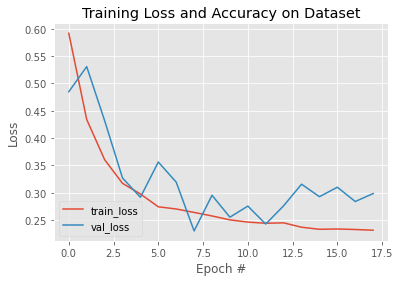

In [9]:
plt.figure()
plt.plot(H.epoch, H.history["loss"], label="train_loss")
plt.plot(H.epoch, H.history["val_loss"], label="val_loss")
plt.grid(False)  # Remove grid
plt.title("Training loss and accuracy on cell dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("DHM_Neurite_loss_curve.svg")

### Test the model on the unseen data and save the predicted results.

In [12]:
# Predict the test data
NUM_TEST_IMAGES=50
test_path= "/Users/behnazyazdani/unet-master/data/master_test/img"
file_list = [f for f in os.listdir(test_path) if f[-3:]=="tif"]
print(len(file_list)) 
file_list=os.listdir(test_path)   
testGene = testGenerator(test_path,file_list)
results = model.predict_generator(testGene,NUM_TEST_IMAGES,verbose=1)
saveResult("/Users/behnazyazdani/unet-master/data/master_test/prediction",results,file_list)

50


/Users/behnazyazdani/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


 4/50 [=>............................] - ETA: 0s 

2023-03-14 10:37:20.927871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 15ms/step
